In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("series_risk.xlsx", sheet_name="original")
df.set_index("Fecha", inplace = True)
df.head()

,Colombia,México,El Salvador,Chile,Argentina
Fecha,,,,,
2004-01-01,0,26,0,6,0
2004-02-01,18,48,0,7,0
2004-03-01,10,100,0,6,12
2004-04-01,0,37,0,9,0
2004-05-01,14,58,0,11,0


In [3]:
X = df[["Colombia"]]
X

,Colombia
Fecha,
2004-01-01,0
2004-02-01,18
2004-03-01,10
2004-04-01,0
2004-05-01,14
...,...
2021-04-01,48
2021-05-01,137
2021-06-01,29


In [4]:
# load pmdarima
import pmdarima
#automatically fit the optimal ARIMA model for given time series
arima_model_fitted = pmdarima.auto_arima(X)
# one-step out-of sample forecast
forecast = arima_model_fitted.predict(n_periods=1)[0]

# load statsmodels
import statsmodels.tsa.arima_model as stm
# fit ARIMA model
model = stm.ARIMA(X, order=(3,1,2))
model_fit = model.fit()
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]

C:\Users\danie\anaconda3\envs\risk\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\danie\anaconda3\envs\risk\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so infe

In [7]:
import arch
from arch import arch_model

# a standard GARCH(1,1) model
garch = arch_model(X, vol='garch', p=1, o=0, q=1)
garch_fitted = garch.fit()

# one-step out-of sample forecast
garch_forecast = garch_fitted.forecast(horizon=1)
predicted_et = garch_forecast.mean['h.1'].iloc[-1]

Iteration:      1,   Func. Count:      6,   Neg. LLF: 920.9222101848309
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1042.325946838137
Iteration:      3,   Func. Count:     19,   Neg. LLF: 783.998149333043
Iteration:      4,   Func. Count:     24,   Neg. LLF: 783.4115437553421
Iteration:      5,   Func. Count:     30,   Neg. LLF: 780.9422592141243
Iteration:      6,   Func. Count:     35,   Neg. LLF: 780.6827026821741
Iteration:      7,   Func. Count:     40,   Neg. LLF: 780.589076674961
Iteration:      8,   Func. Count:     45,   Neg. LLF: 780.5800051387664
Iteration:      9,   Func. Count:     50,   Neg. LLF: 780.5795840032448
Iteration:     10,   Func. Count:     55,   Neg. LLF: 780.5795814881818
Iteration:     11,   Func. Count:     59,   Neg. LLF: 780.5795808196458
Optimization terminated successfully    (Exit mode 0)
            Current function value: 780.5795814881818
            Iterations: 11
            Function evaluations: 59
            Gradient evaluations: 11


C:\Users\danie\anaconda3\envs\risk\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [18]:
# fit ARIMA on returns 
arima_model_fitted = pmdarima.auto_arima(X)
p, d, q = arima_model_fitted.order
arima_residuals = arima_model_fitted.arima_res_.resid

# fit a GARCH(1,1) model on the residuals of the ARIMA model
garch = arch.arch_model(arima_residuals, p=1, q=1)
garch_fitted = garch.fit()

# Use ARIMA to predict mu
predicted_mu = arima_model_fitted.predict(n_periods=1)[0]
# Use GARCH to predict the residual
garch_forecast = garch_fitted.forecast(horizon=1)
predicted_et = garch_forecast.mean['h.1'].iloc[-1]
# Combine both models' output: yt = mu + et
prediction = predicted_mu + predicted_et

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1251.0708173283506
Iteration:      2,   Func. Count:     12,   Neg. LLF: 937.1614055891741
Iteration:      3,   Func. Count:     18,   Neg. LLF: 770.9824606441341
Iteration:      4,   Func. Count:     23,   Neg. LLF: 768.8393981342094
Iteration:      5,   Func. Count:     28,   Neg. LLF: 770.192344605375
Iteration:      6,   Func. Count:     34,   Neg. LLF: 766.3682771878657
Iteration:      7,   Func. Count:     39,   Neg. LLF: 764.6488825060212
Iteration:      8,   Func. Count:     44,   Neg. LLF: 763.8719915678275
Iteration:      9,   Func. Count:     49,   Neg. LLF: 763.6875645654836
Iteration:     10,   Func. Count:     54,   Neg. LLF: 763.6613303565025
Iteration:     11,   Func. Count:     59,   Neg. LLF: 763.6600850148077
Iteration:     12,   Func. Count:     64,   Neg. LLF: 763.6600643411977
Iteration:     13,   Func. Count:     69,   Neg. LLF: 763.6600636151259
Optimization terminated successfully    (Exit mode 0)
          

array([26.26124991, 27.84274297, 27.84274297, 27.84274297, 27.84274297,
       27.84274297, 27.84274297, 27.84274297, 27.84274297, 27.84274297])

In [24]:
# Use ARIMA to predict mu
predicted_mu = arima_model_fitted.predict(n_periods=10)
# Use GARCH to predict the residual
garch_forecast = garch_fitted.forecast(horizon=10)
predicted_et = garch_forecast.mean['h.10'].iloc[-1]
# Combine both models' output: yt = mu + et
prediction = predicted_mu + predicted_et

C:\Users\danie\anaconda3\envs\risk\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


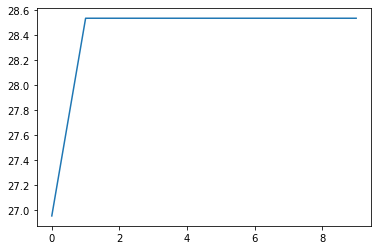

In [28]:
import matplotlib.pyplot as plt
plt.plot(prediction)